# CVRP env test
**Visited all nodes once, while minimizing total length. If the capacity is full, the vehicle has to return to depot to off-load the demands.** In other words, the depot can be visited multiple times. 

+ How to initialize the environment
+ How to generate and load test dataset
+ How to generate a batch of training data
+ How to compute cost
+ How to visualize the result

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [2]:
from envs.cvrp_env import CVRPProblem

----

## 1. How to initialize the environment

In [3]:
# build cvrp100 env
graph_size = 100
seed = 9527
cvrp_env = CVRPProblem(graph_size, seed)

In [4]:
# Check currently supported problems: graph_size - demand
cvrp_env.capacity_dict

{10: 20.0, 20: 30.0, 50: 40.0, 100: 50.0}

---
## 2. How to generate and load test dataset

Here I will generate 333 cvrp samples as testing dataset

In [5]:
# Generate and save a dataset for testing
filename = cvrp_env.generate_test_dataset(dataset_size=333)
print(filename)

Generate test dataset at: test_dataset/cvrp100_333_seed9527.pkl
test_dataset/cvrp100_333_seed9527.pkl


In [6]:
# Load dataset
test_dataset = cvrp_env.load_test_dataset(filename)

Dataset loaded, it's a length-333-list. During testing the batch_size is fixed as 1!
Sample data:
depot: (1, 2), float64
loc: (1, 100, 2), float64
demand: (1, 100), float64


---

## 3. How to generate a batch of training data

In [7]:
batch_size = 3
batch_data = cvrp_env.generate_batch_data(batch_size)

In [8]:
print(batch_data.keys())

dict_keys(['depot', 'loc', 'demand'])


In [9]:
print(batch_data['depot'])
print(batch_data['depot'].shape)
print(batch_data['loc'].shape,batch_data['demand'].shape)

[[0.30694645 0.47351092]
 [0.60950616 0.26931764]
 [0.62732304 0.48588891]]
(3, 2)
(3, 100, 2) (3, 100)


In [10]:
# Demand for each node is integer in [1,9] scaled by capacity
print(batch_data['demand'])
print(batch_data['demand'].min() * 50, batch_data['demand'].max() * 50)

[[0.12 0.1  0.18 0.14 0.04 0.18 0.08 0.02 0.02 0.1  0.02 0.1  0.04 0.08
  0.1  0.06 0.16 0.06 0.16 0.14 0.08 0.02 0.02 0.16 0.1  0.14 0.04 0.06
  0.06 0.18 0.12 0.06 0.1  0.04 0.08 0.1  0.04 0.14 0.1  0.08 0.1  0.02
  0.12 0.1  0.18 0.16 0.16 0.14 0.08 0.02 0.12 0.02 0.12 0.1  0.08 0.02
  0.04 0.04 0.1  0.06 0.02 0.12 0.14 0.02 0.02 0.08 0.04 0.16 0.12 0.06
  0.16 0.08 0.14 0.14 0.06 0.12 0.16 0.16 0.08 0.08 0.08 0.14 0.08 0.16
  0.12 0.1  0.1  0.12 0.04 0.02 0.14 0.06 0.06 0.14 0.14 0.04 0.08 0.1
  0.1  0.08]
 [0.06 0.16 0.08 0.12 0.1  0.04 0.08 0.12 0.12 0.08 0.12 0.14 0.04 0.04
  0.16 0.14 0.18 0.16 0.16 0.06 0.12 0.12 0.16 0.1  0.16 0.14 0.16 0.06
  0.16 0.06 0.18 0.18 0.18 0.1  0.08 0.1  0.08 0.1  0.04 0.1  0.08 0.18
  0.12 0.06 0.02 0.02 0.16 0.16 0.1  0.04 0.04 0.02 0.18 0.14 0.18 0.02
  0.02 0.18 0.06 0.04 0.12 0.12 0.12 0.06 0.14 0.02 0.12 0.18 0.06 0.1
  0.06 0.18 0.04 0.16 0.14 0.16 0.16 0.12 0.1  0.16 0.02 0.18 0.16 0.08
  0.04 0.14 0.08 0.06 0.12 0.02 0.18 0.14 0.04 0.1  0

----

## 4. How to compute cost

In [11]:
# load pretrained result
def load_sample_data(loadpath):
    with open(loadpath, 'rb') as f:
        return pickle.load(f)
    
loadpath = "sample_data/cvrp100.pkl"
cvrp100_samples = load_sample_data(loadpath)
print(len(cvrp100_samples))

# batch_size = 1
single_sample = cvrp100_samples[-1]
print(single_sample['cost'])
single_sample_inputs = {'loc': single_sample['loc'],
                        'demand': single_sample['demand'],
                        'depot': single_sample['depot']}

15
[13.91593]


In [12]:
cost = cvrp_env.compute_cost(single_sample_inputs, single_sample['solution'])
print(cost, cost.shape)

[13.91593] (1,)


-----

## 5. Visualize

Cost: 14.06
Depot: (0.47,0.57)


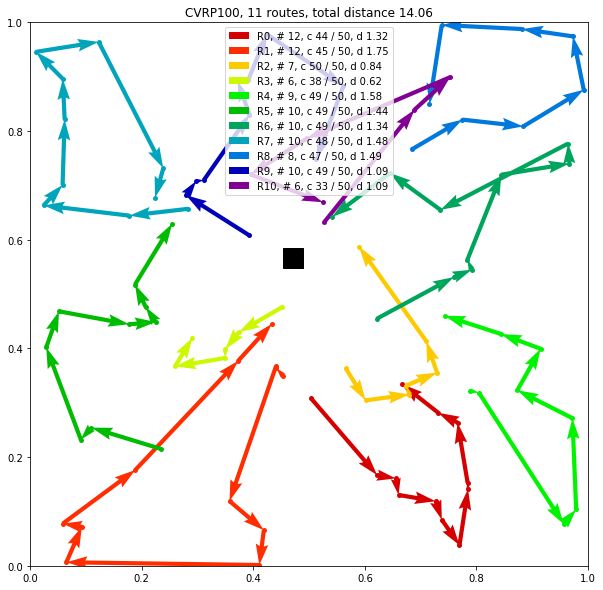

Cost: 13.95
Depot: (0.61,0.36)


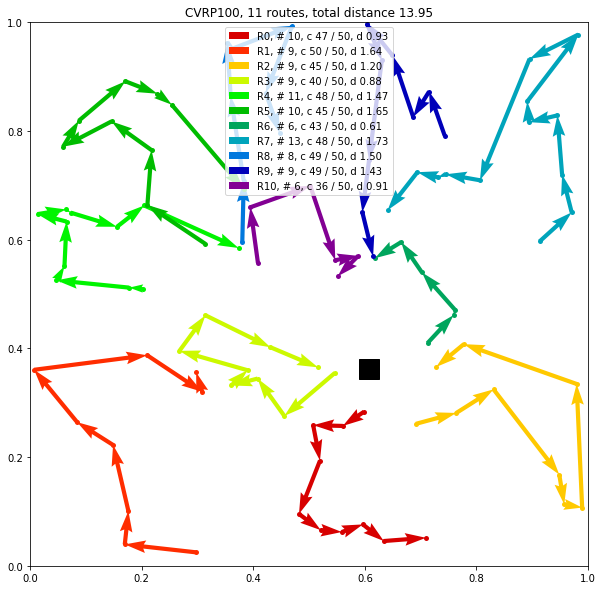

Cost: 15.10
Depot: (0.38,0.66)


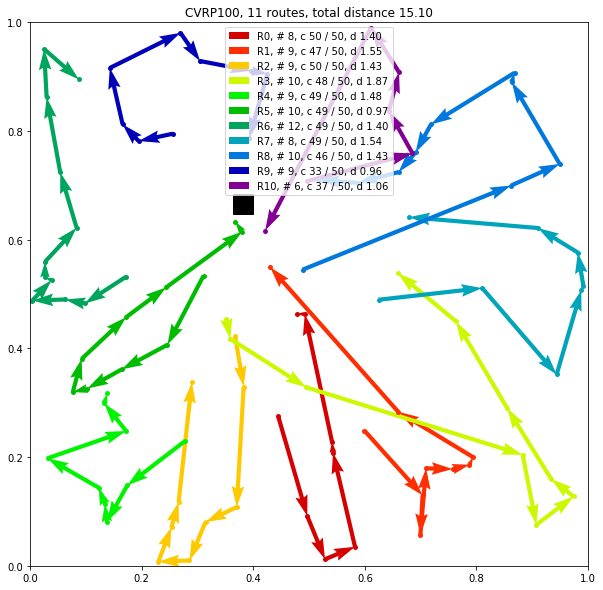

Cost: 20.92
Depot: (0.90,1.00)


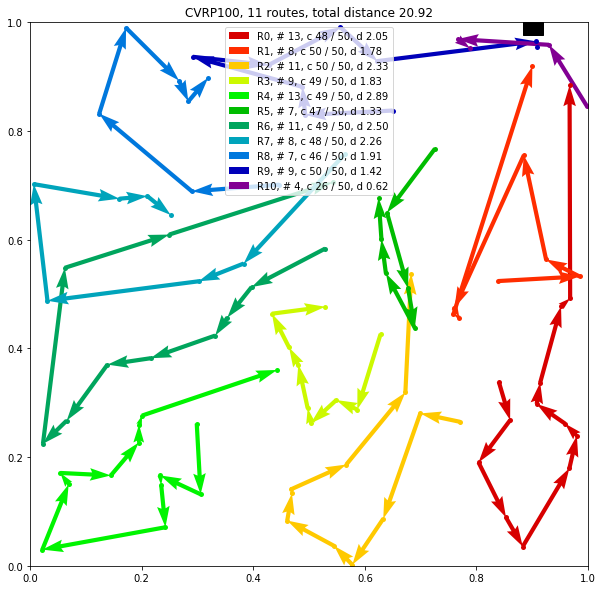

Cost: 17.58
Depot: (0.02,0.60)


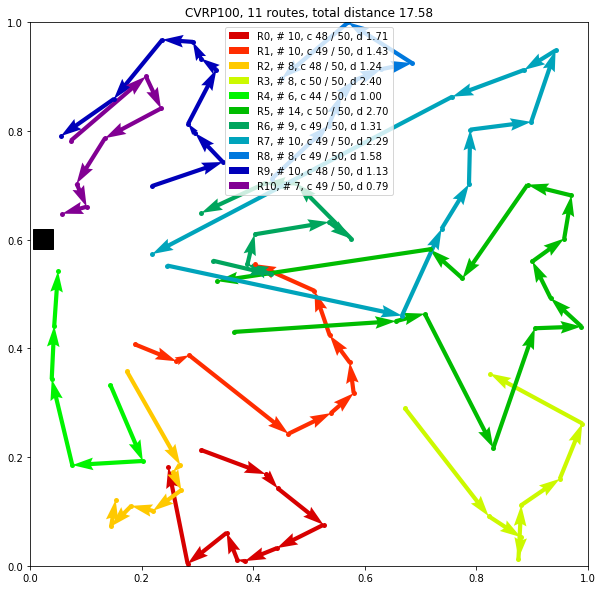

Cost: 15.77
Depot: (0.86,0.61)


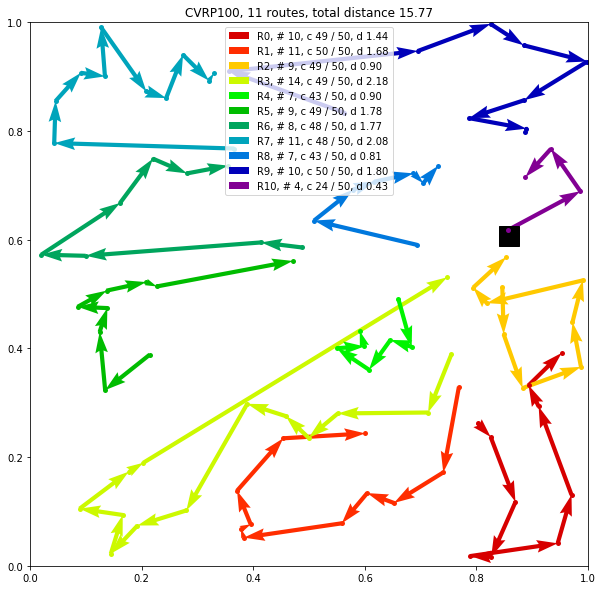

Cost: 19.25
Depot: (0.02,0.63)


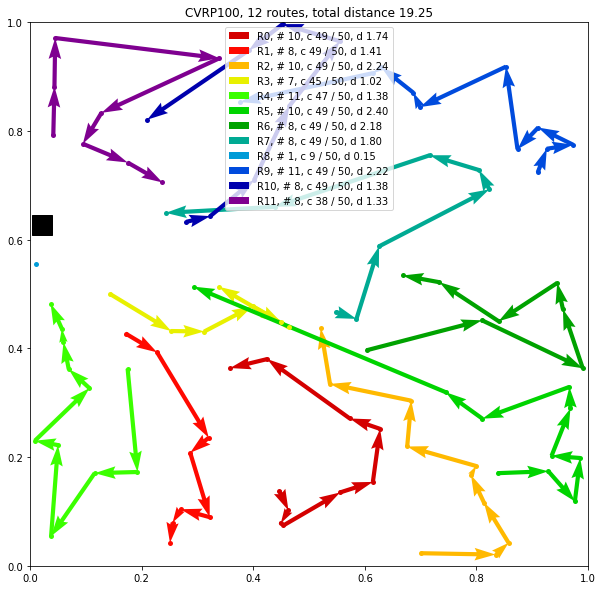

Cost: 17.34
Depot: (0.25,0.95)


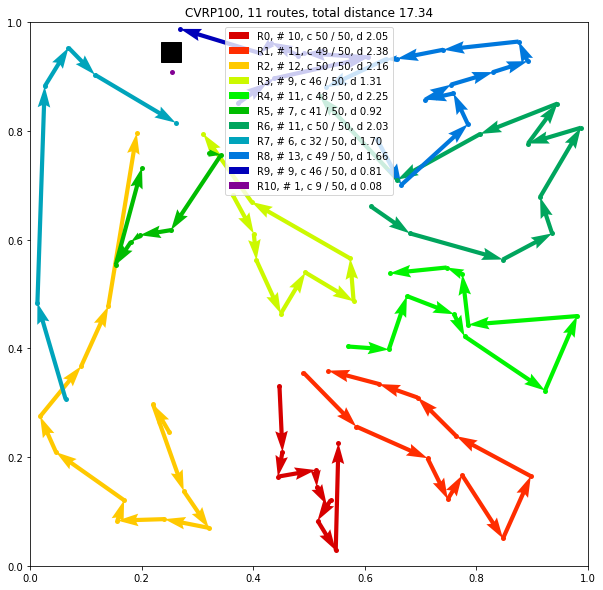

Cost: 18.11
Depot: (0.82,0.89)


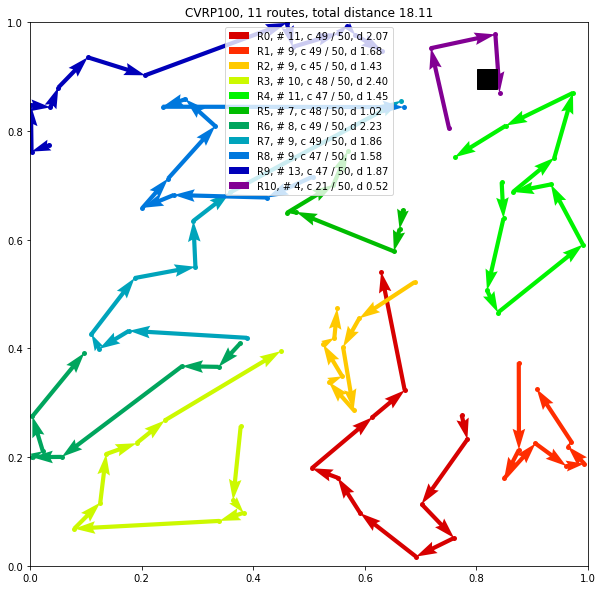

Cost: 17.09
Depot: (0.81,0.21)


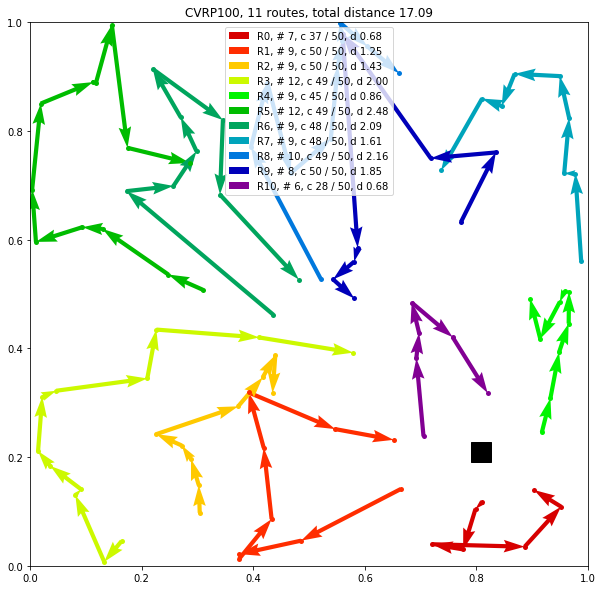

Cost: 15.05
Depot: (0.57,0.73)


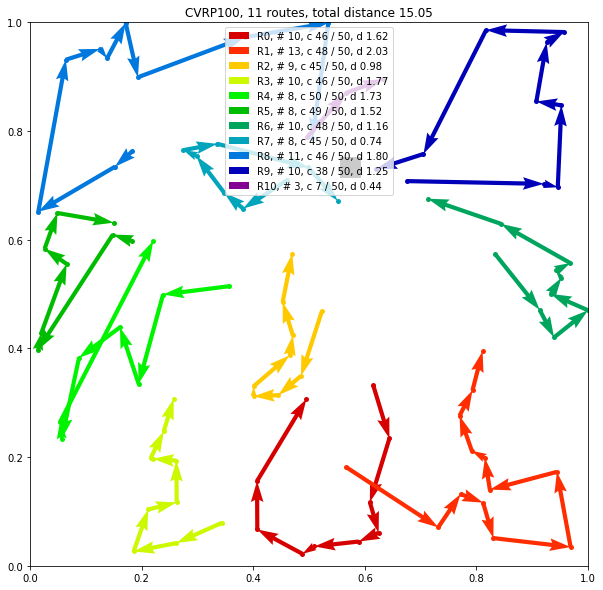

Cost: 16.46
Depot: (0.10,0.33)


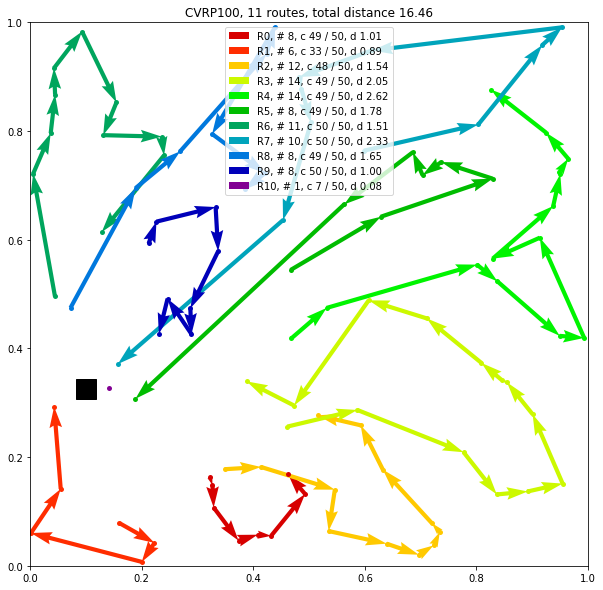

Cost: 16.39
Depot: (0.13,0.75)


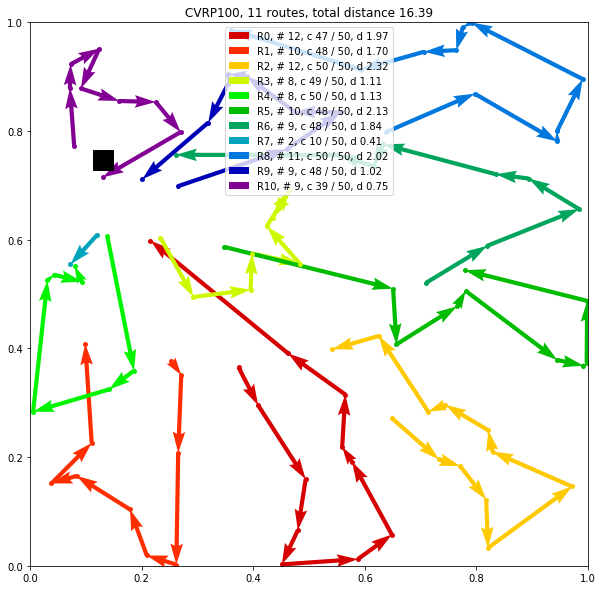

Cost: 13.11
Depot: (0.42,0.56)


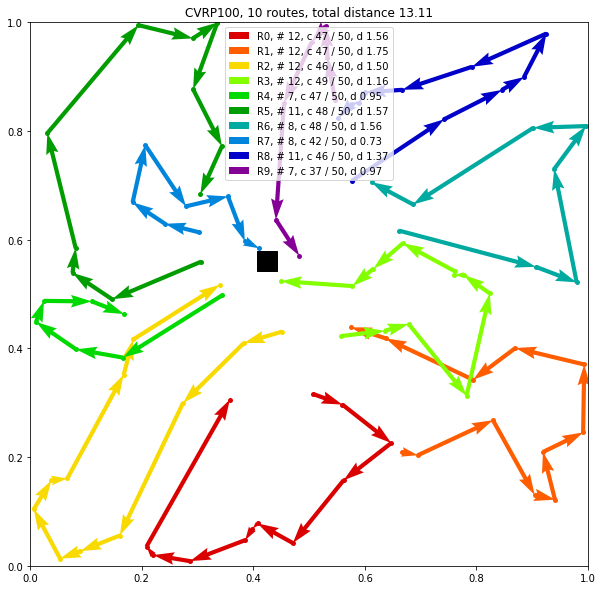

Cost: 13.92
Depot: (0.55,0.63)


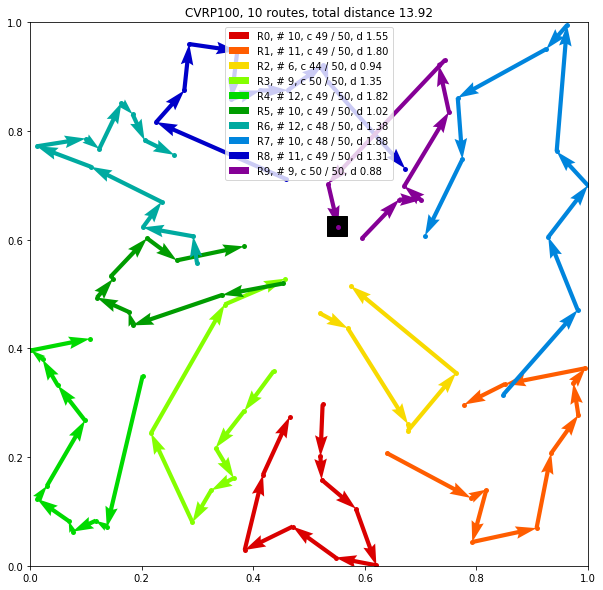

In [14]:
for i in range(len(cvrp100_samples)):
    curr_sample = cvrp100_samples[i]
    curr_sample_inputs = {'loc': curr_sample['loc'],
                        'demand': curr_sample['demand'],
                        'depot': curr_sample['depot']}
    curr_sample_selected_idxs = curr_sample['solution']
    curr_sample_cost = curr_sample['cost']
    print("Cost: {:.2f}".format(curr_sample_cost[0]))
    cvrp_env.plot(curr_sample_inputs, 
                       curr_sample_selected_idxs, 
                       round_demand=True,
                       visualize_demands=False,
                       savepath=None)
    print("==================")